# Time Series Analysis

Yearly, Monthly, Seasonly, Daily, Weekly patterns

## Retrieving Financial Data

In [19]:
# quandl for financial data
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [89]:
%matplotlib inline
sb.set_style('whitegrid')

In [12]:
quandl.ApiConfig.api_key = 'Ps7JSnxTbDtvadwT1zoS'

In [69]:
# Retrieve TSLA data from Quandl
tesla = quandl.get('WIKI/TSLA')

# Retrieve the GM data from Quandl
gm = quandl.get('WIKI/GM')

## Data Exploration

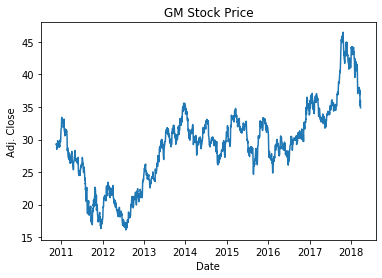

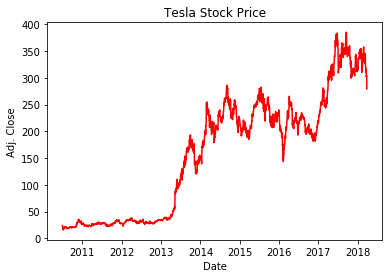

In [53]:
# The adjusted close accounts for stock splits, so that is what we should graph
sb.lineplot(x = gm.index, y = 'Adj. Close', data = gm)
plt.title('GM Stock Price')
plt.show()

sb.lineplot(x = tesla.index, y = 'Adj. Close', data = tesla, color = 'r')
plt.title('Tesla Stock Price')
plt.show()

## Comparing the total value of the company

Get the number of shares per year for Tesla and GM

In [54]:
# Yearly average numbr of shares for Tesla and GM

tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 
                2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 
                2010: 51e6}

gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 
             2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 
             2010:1.50e9}

## Adding Market Capitalization for Tesla

Market Cap = No of Shares * Share Price

In [70]:
# Create a year column
tesla['Year'] = tesla.index.year

In [71]:
# Take dates from index and move to Date column
tesla.reset_index(level = 0, inplace  = True)
tesla['cap'] = 0

In [72]:
#Calculate Market cap for all years
for i, year in enumerate(tesla['Year']):
    # Retrieve the shares for the year
    shares = tesla_shares.get(year)
    
    # Update the cap column to shares times the price
    tesla.loc[i, 'cap'] = shares * tesla.loc[i, 'Adj. Close']

In [73]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,cap
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010,1.218390e+09
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010,1.215330e+09
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010,1.119960e+09
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010,9.792000e+08
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010,8.216100e+08


## Adding Market Capitalization for GM

In [74]:
# Create a year column
gm['Year'] = gm.index.year

In [75]:
# Take dates from index and move to Date column
gm.reset_index(level = 0, inplace  = True)
gm['cap'] = 0

In [76]:
#Calculate Market cap for all years
for i, year in enumerate(gm['Year']):
    # Retrieve the shares for the year
    shares = gm_shares.get(year)
    
    # Update the cap column to shares times the price
    gm.loc[i, 'cap'] = shares * gm.loc[i, 'Adj. Close']

In [77]:
gm.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,cap
0,2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0,2010,4.394145e+10
1,2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0,2010,4.403142e+10
2,2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0,2010,4.380008e+10
3,2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0,2010,4.273335e+10
4,2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0,2010,4.302895e+10


### Merging the two datasets

In [80]:
# Merge the two datasets and rename the columns
cars = gm.merge(tesla, how = 'inner', on = 'Date')

cars.rename(columns = {'cap_x': 'gm_cap', 'cap_y': 'tesla_cap'},
           inplace = True)

In [82]:
# Select only the relevant columns
cars = cars.loc[:, ['Date', 'gm_cap', 'tesla_cap']]

In [83]:
# Divide to get market cap in billions of dollars
cars['gm_cap'] = cars['gm_cap'] / 1e9
cars['tesla_cap'] = cars['tesla_cap'] / 1e9

cars.head()

,Date,gm_cap,tesla_cap
0,2010-11-18,43.941453,1.52439
1,2010-11-19,44.031417,1.58049
2,2010-11-22,43.800079,1.70340
3,2010-11-23,42.733352,1.76307
4,2010-11-24,43.028951,1.80897


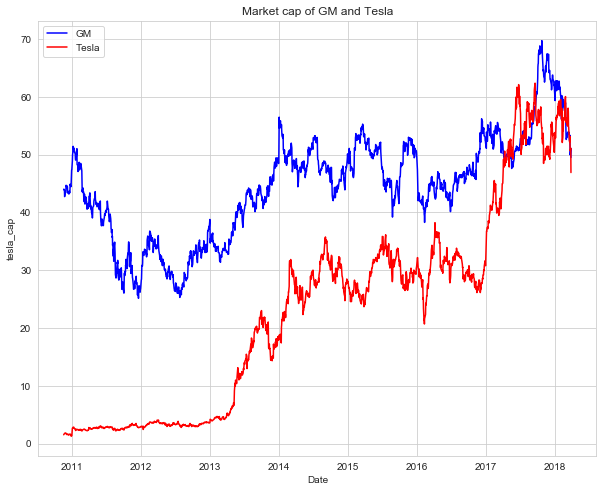

In [94]:
plt.figure(figsize = (10,8))
sb.lineplot(x = 'Date', y = 'gm_cap', data = cars, color = 'blue', label = 'GM')
sb.lineplot(x = 'Date', y = 'tesla_cap', data = cars, color = 'red', label = 'Tesla')
plt.title('Market cap of GM and Tesla')
plt.legend()

In [95]:
import numpy as np

# Find the first and last time Tesla was valued higher than GM
first_date = cars.loc[np.min(list(np.where(cars['tesla_cap'] > 
                                           cars['gm_cap'])[0])), 'Date']
last_date = cars.loc[np.max(list(np.where(cars['tesla_cap'] > 
                                           cars['gm_cap'])[0])), 'Date']

print("Tesla was valued higher than GM from {} to {}".
      format(first_date.date(),last_date.date()))

Tesla was valued higher than GM from 2017-04-10 to 2018-03-23


## Modeling with Prophet